In [1]:
import numpy as np
import pandas as pd
from jump.collate import concat_annotations
import seaborn as sns

/Users/jarevalo/mambaforge/envs/jump_labeler/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
output_dir = '/Users/jarevalo/projects/compound-annotator/output/'
annotations = concat_annotations(output_dir).drop_duplicates().reset_index(drop=True).copy()
annotations['link_id'] = annotations['gene'] + '_' + annotations['inchikey']
crosstab = annotations.pivot_table(index='link_id', columns='rel_type', values='inchikey', aggfunc=len).fillna(0).astype(int)
cooc = crosstab.T.dot(crosstab)

In [3]:
n_cooc = cooc / np.diagonal(cooc)
m_edges = n_cooc.where(np.triu(np.ones(n_cooc.shape), k=1).astype(np.bool_))
m_edges = m_edges.melt(ignore_index=False).sort_values(by='value', ascending=False).dropna()
m_edges.index.name = 'source'
m_edges.columns = 'target', 'weight'
m_edges = m_edges.query('weight > 0').reset_index()
m_edges

,source,target,weight
0,DPI,DRUG_ENZYME,1.000000
1,DPI,DRUG_TRANSPORTER,1.000000
2,DRUG_BINDING_GENE,DRUG_BINDINH_GENE,1.000000
3,DPI,negative modulator,1.000000
4,DPI,DRUG_TARGET,1.000000
...,...,...,...
409,DECREASES_DEGENERATION_CHddG,DOWNREGULATES_CHdG,0.000054
410,DRUG_BINDACT_GENE,UPREGULATES_CHuG,0.000051
411,DRUG_BINDINH_GENE,UPREGULATES_CHuG,0.000051
412,DECREASES_DEGENERATION_CHddG,UPREGULATES_CHuG,0.000051


<Axes: xlabel='weight', ylabel='Count'>

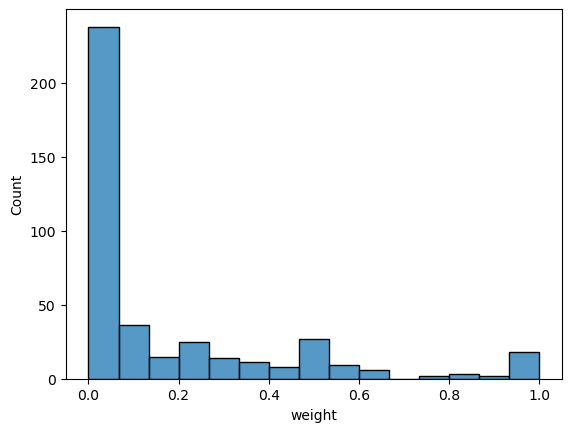

In [4]:
sns.histplot(m_edges, x='weight')

In [5]:
m_edges.groupby('source').weight.describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
ASSOCIATES_CHaG,31.0,0.083319,0.186645,0.002470,0.016175,0.027829,0.047758,1.000000
BINDS_CHbG,35.0,0.334014,0.255584,0.000437,0.092379,0.355140,0.500000,0.998563
CbG,34.0,0.313049,0.231032,0.000437,0.088725,0.342787,0.496521,0.777778
CdG,13.0,0.014882,0.050861,0.000061,0.000419,0.000550,0.000667,0.184140
CuG,12.0,0.015264,0.045367,0.000778,0.001327,0.002524,0.002714,0.159286
DECREASES_DEGENERATION_CHddG,13.0,0.002718,0.008877,0.000051,0.000075,0.000328,0.000374,0.032258
DOWNREGULATES_CHdG,23.0,0.075633,0.151442,0.001764,0.012512,0.019023,0.032631,0.666667
DPI,31.0,0.515375,0.377504,0.002045,0.214138,0.500000,0.960438,1.000000
DRUG_ACTIVATION_GENE,22.0,0.078739,0.114737,0.000511,0.007547,0.021685,0.071295,0.363636


In [6]:
m_edges.groupby('target').weight.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
BINDS_CHbG,1.0,0.030644,NaN,0.030644,0.030644,0.030644,0.030644,0.030644
CbG,2.0,0.514470,0.684611,0.030378,0.272424,0.514470,0.756517,0.998563
CdG,3.0,0.001552,0.001933,0.000437,0.000437,0.000437,0.002110,0.003784
CuG,3.0,0.004347,0.002510,0.002898,0.002898,0.002898,0.005072,0.007245
DECREASES_DEGENERATION_CHddG,3.0,0.666667,0.288675,0.500000,0.500000,0.500000,0.750000,1.000000
DOWNREGULATES_CHdG,6.0,0.049487,0.078395,0.000054,0.001167,0.002347,0.081031,0.184140
DPI,7.0,0.154437,0.248992,0.000140,0.000769,0.016632,0.271628,0.519497
DRUG_ACTIVATION_GENE,8.0,0.045829,0.042015,0.000366,0.002012,0.046469,0.085895,0.098061
DRUG_BINDACT_GENE,5.0,0.212274,0.114828,0.018051,0.216606,0.231047,0.296029,0.299639


In [7]:
annotations.query('rel_type=="DPI"').database.value_counts()

database
biokg    7155
Name: count, dtype: int64

In [8]:
cooc.to_csv('/Users/jarevalo/Downloads/cooc.csv', sep='\t')

## Co-ocurrence of annotations
<img src="cooc.svg">

# Merging annotations

In [9]:
mapper = {
    "DOWNREGULATES_CHdG": "downregulates",
    "CdG": "downregulates",
    "UPREGULATES_CHuG": "upregulates",
    "CuG": "upregulates",
    "DRUG_TARGET": "targets",
    "target": "targets",
    "DRUG_CARRIER": "carries",
    "carrier": "carries",
    "DRUG_ENZYME": "enzyme",
    "enzyme": "enzyme",
    "DRUG_TRANSPORTER": "transports",
    "transporter": "transports",
    "BINDS_CHbG": "binds",
    "CbG": "binds",
    "DRUG_BINDING_GENE": "binds",
}

In [10]:
output_dir = '/Users/jarevalo/projects/compound-annotator/output/'
annotations = concat_annotations(output_dir)
annotations['rel_type'] = annotations['rel_type'].apply(lambda x: mapper.get(x, x))
annotations = annotations.query('not rel_type.isin(["DPI", "DRUG_BINDINH_GENE"])')
annotations = annotations.drop_duplicates(['inchikey', 'rel_type', 'gene']).reset_index(drop=True).copy()
annotations['link_id'] = annotations['gene'] + '_' + annotations['inchikey']
crosstab = annotations.pivot_table(index='link_id', columns='rel_type', values='inchikey', aggfunc=len).fillna(0).astype(int)
cooc = crosstab.T.dot(crosstab)
cooc.to_csv('/Users/jarevalo/Downloads/cooc_norm.csv', sep='\t')

n_cooc = cooc / np.diagonal(cooc)
m_edges = n_cooc.where(np.triu(np.ones(n_cooc.shape), k=1).astype(np.bool_))
m_edges = m_edges.melt(ignore_index=False).sort_values(by='value', ascending=False).dropna()
m_edges.index.name = 'source'
m_edges.columns = 'target', 'weight'
m_edges = m_edges.query('weight > 0').reset_index()
m_edges

,source,target,weight
0,ASSOCIATES_CHaG,DECREASES_DEGENERATION_CHddG,1.000000
1,binds,negative modulator,1.000000
2,allosteric modulator,inhibitory allosteric modulator,1.000000
3,inhibitor,inhibitory allosteric modulator,1.000000
4,binds,positive modulator,0.777778
...,...,...,...
193,INCREASES_DEGENERATION_CHidG,upregulates,0.000051
194,antagonist,upregulates,0.000051
195,DECREASES_DEGENERATION_CHddG,binds,0.000051
196,inverse agonist,upregulates,0.000026


In [11]:
all_counts = []
for rel_type, links in annotations.groupby('rel_type'):
    counts = links.link_id.isin(annotations.query('rel_type!=@rel_type').link_id).value_counts(normalize=True)
    counts['rel_type'] = rel_type
    counts['total'] = len(links)
    all_counts.append(counts.to_dict())
all_counts = pd.DataFrame(all_counts).fillna(0).set_index('rel_type')#.astype(int)
all_counts.columns = ['% Not in others', ' % in others', 'total']

In [12]:
all_counts.sort_values(by=['% Not in others', 'total'])

,% Not in others,% in others,total
rel_type,,,
inhibitory allosteric modulator,0.000000,1.000000,1
DECREASES_DEGENERATION_CHddG,0.000000,1.000000,2
negative modulator,0.000000,1.000000,2
INCREASES_DEGENERATION_CHidG,0.000000,1.000000,3
DRUG_BINDACT_GENE,0.000000,1.000000,277
partial agonist,0.090909,0.909091,11
positive modulator,0.097222,0.902778,72
IS_ACTIVE_ON_CELLULAR_LEVEL_CHiaoclG,0.129032,0.870968,31
antagonist,0.205937,0.794063,539


## Co-ocurrence of annotations
<img src="norm.svg">

In [13]:
annotations.groupby('rel_type')['gene'].nunique().sort_values(ascending=False)

rel_type
upregulates                                 13979
downregulates                               13772
ASSOCIATES_CHaG                             11741
IS_ACTIVE_IN_METABOLISM_CHiaimG             10771
IS_ACTIVE_ON_DNA_OR_RNA_LEVEL_CHiaodorlG     9111
binds                                        3607
DRUG_INHIBITION_GENE                         1329
DRUG_ACTIVATION_GENE                         1057
DRUG_CATALYSIS_GENE                          1042
targets                                       944
inhibitor                                     449
DRUG_REACTION_GENE                            376
enzyme                                        180
antagonist                                    112
blocker                                       109
agonist                                       106
transports                                     92
DRUG_BINDACT_GENE                              71
activator                                      40
modulator                                

In [14]:
annotations.groupby('rel_type')['inchikey'].nunique().sort_values(ascending=False)

rel_type
binds                                       1583
DRUG_INHIBITION_GENE                        1157
targets                                      928
DRUG_ACTIVATION_GENE                         672
upregulates                                  580
enzyme                                       546
downregulates                                529
DRUG_CATALYSIS_GENE                          482
inhibitor                                    450
ASSOCIATES_CHaG                              341
transports                                   322
antagonist                                   217
carries                                      161
agonist                                      131
IS_ACTIVE_ON_DNA_OR_RNA_LEVEL_CHiaodorlG     121
DRUG_BINDACT_GENE                            101
blocker                                       73
DRUG_REACTION_GENE                            34
activator                                     28
allosteric modulator                          27
IS_ACTIVE_O

In [15]:
annotations['gene'].value_counts().describe()

count    20486.000000
mean         8.644538
std         15.422026
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max        686.000000
Name: count, dtype: float64

In [16]:
annotations['inchikey'].value_counts().describe()

count     2484.000000
mean        71.293076
std        743.325168
min          1.000000
25%          2.000000
50%          5.000000
75%         18.000000
max      30099.000000
Name: count, dtype: float64

In [17]:
threshold = annotations.inchikey.value_counts().quantile(0.99)
print(threshold)
nohub_cpds = annotations.inchikey.value_counts()[lambda x: x<threshold].index
annotations = annotations.query('inchikey.isin(@nohub_cpds)')

741.8200000000033


In [18]:
annotations.drop('link_id', axis=1).to_parquet('../output/filtered_annotations.parquet', index=False)

# Final

In [19]:
annotations = pd.read_parquet('../output/filtered_annotations.parquet')
annotations['link_id'] = annotations['gene'] + '_' + annotations['inchikey']
crosstab = annotations.pivot_table(index='link_id', columns='rel_type', values='inchikey', aggfunc=len).fillna(0).astype(int)
cooc = crosstab.T.dot(crosstab)
cooc.to_csv('/Users/jarevalo/Downloads/cooc_norm_filtered.csv', sep='\t')

n_cooc = cooc / np.diagonal(cooc)
m_edges = n_cooc.where(np.triu(np.ones(n_cooc.shape), k=1).astype(np.bool_))
m_edges = m_edges.melt(ignore_index=False).sort_values(by='value', ascending=False).dropna()
m_edges.index.name = 'source'
m_edges.columns = 'target', 'weight'
m_edges = m_edges.query('weight > 0').reset_index()
m_edges

,source,target,weight
0,ASSOCIATES_CHaG,DECREASES_DEGENERATION_CHddG,1.000000
1,allosteric modulator,inhibitory allosteric modulator,1.000000
2,inhibitor,inhibitory allosteric modulator,1.000000
3,binds,negative modulator,1.000000
4,binds,positive modulator,0.777778
...,...,...,...
176,IS_ACTIVE_IN_METABOLISM_CHiaimG,downregulates,0.000090
177,inverse agonist,upregulates,0.000083
178,DECREASES_DEGENERATION_CHddG,upregulates,0.000083
179,INCREASES_DEGENERATION_CHidG,upregulates,0.000083


## Co-ocurrence of annotations
<img src="norm_filtered.svg">

In [20]:
annotations = pd.read_parquet('../output/filtered_annotations.parquet')

In [21]:
annotations.shape, annotations.gene.nunique(), annotations.inchikey.nunique()

((68251, 4), 10411, 2459)

In [22]:
annotations.groupby('rel_type')['gene'].nunique().sort_values(ascending=False)

rel_type
upregulates                                 4679
downregulates                               4488
ASSOCIATES_CHaG                             2925
binds                                       2596
DRUG_INHIBITION_GENE                        1280
IS_ACTIVE_ON_DNA_OR_RNA_LEVEL_CHiaodorlG    1007
DRUG_ACTIVATION_GENE                        1002
DRUG_CATALYSIS_GENE                          909
targets                                      899
inhibitor                                    442
DRUG_REACTION_GENE                           374
enzyme                                       170
antagonist                                   112
blocker                                      109
agonist                                      104
transports                                    90
DRUG_BINDACT_GENE                             70
activator                                     40
modulator                                     30
allosteric modulator                          28
positive mo

In [23]:
annotations.groupby('rel_type')['inchikey'].nunique().sort_values(ascending=False)

rel_type
binds                                       1561
DRUG_INHIBITION_GENE                        1134
targets                                      910
DRUG_ACTIVATION_GENE                         650
upregulates                                  557
enzyme                                       532
downregulates                                506
DRUG_CATALYSIS_GENE                          468
inhibitor                                    440
ASSOCIATES_CHaG                              318
transports                                   311
antagonist                                   215
carries                                      153
agonist                                      128
IS_ACTIVE_ON_DNA_OR_RNA_LEVEL_CHiaodorlG     105
DRUG_BINDACT_GENE                             99
blocker                                       72
DRUG_REACTION_GENE                            33
activator                                     27
allosteric modulator                          26
IS_ACTIVE_O